<a href="https://colab.research.google.com/github/abhinavbulusu/Abhi-s-Portfolio-Projects/blob/main/Customer_Segmentation_Using_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')  # Replace with your dataset name

# Display the first few rows
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Understanding Structure and Quality of the dataset

In [5]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display data types
print("\nData Types:\n", df.dtypes)

# Describe numerical columns
print("\nDescriptive Statistics:\n", df.describe())


Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Descriptive Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000  

Visualize Data

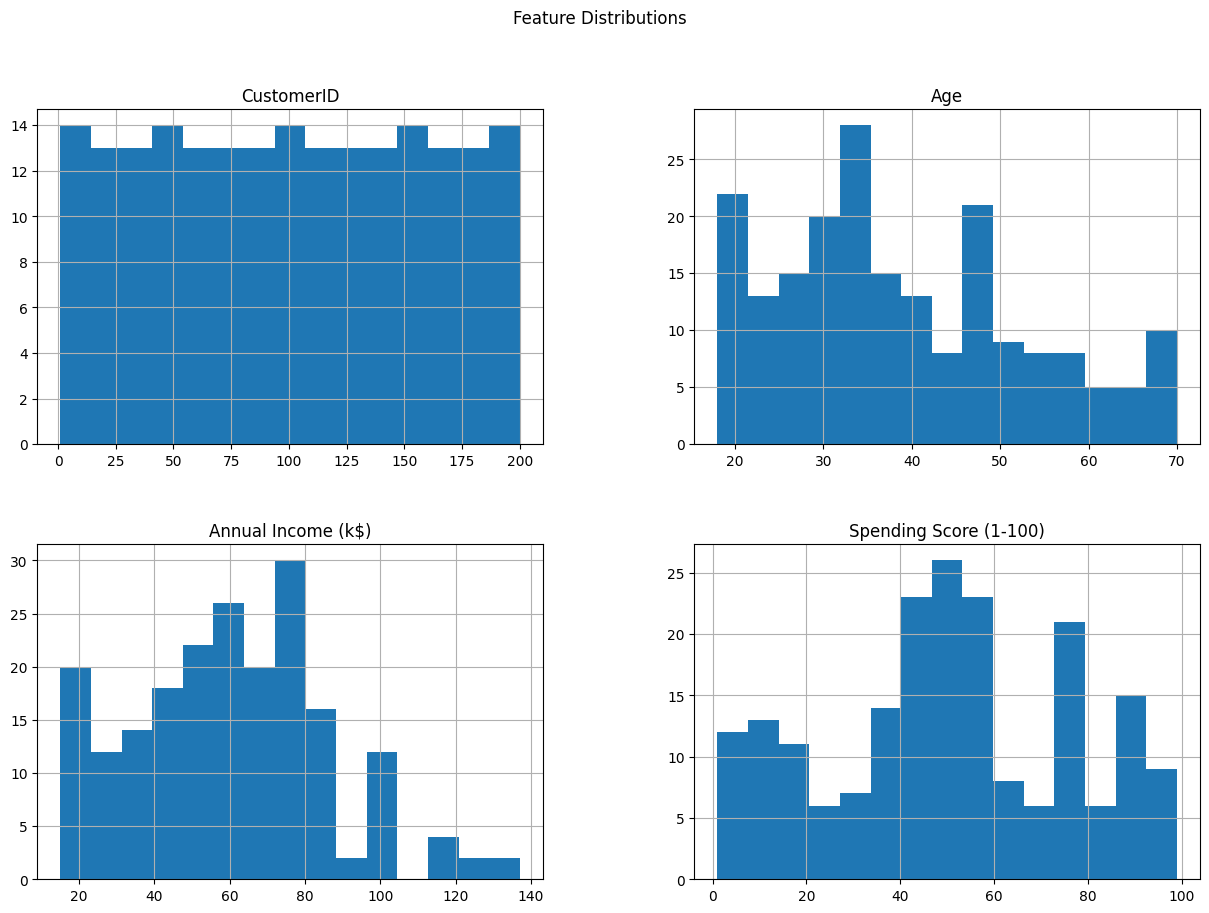

In [6]:
# Visualize numerical features
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()


Correlation Analysis

In [7]:
# Example: Income-to-Age Ratio
df['Income_Age_Ratio'] = df['Annual Income (k$)'] / df['Age']


In [8]:
# Placeholder example (if data supports it)
df['Recency'] = ...  # Days since last purchase
df['Frequency'] = ...  # Number of purchases
df['Monetary'] = ...  # Total spend


In [9]:
# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


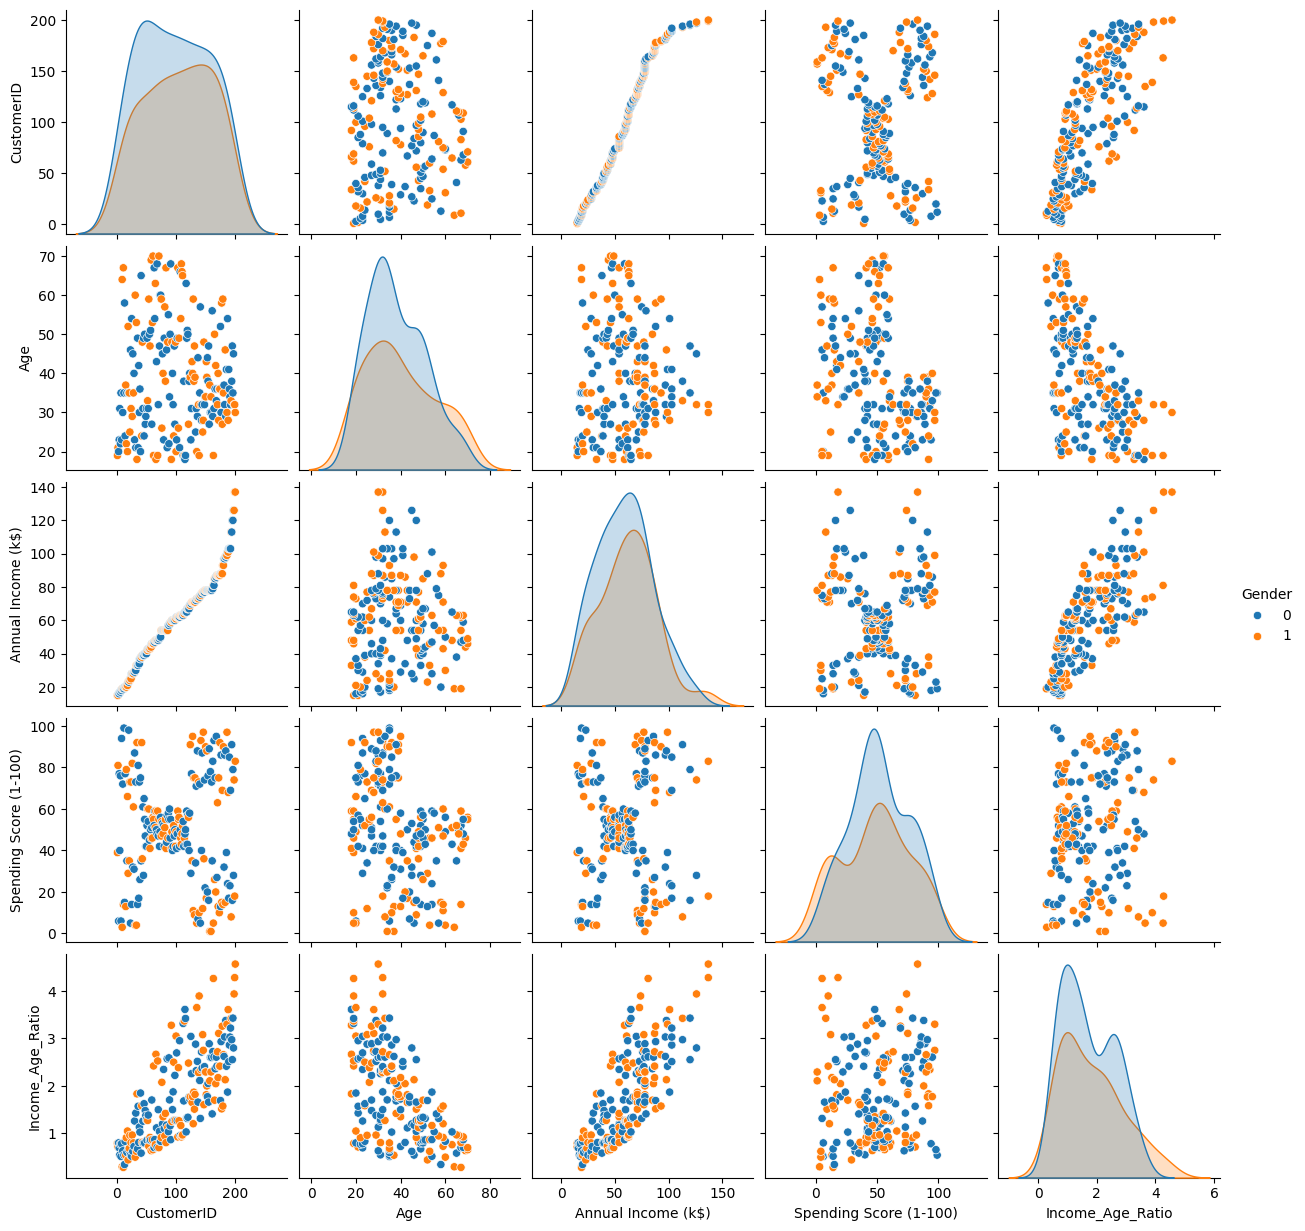

In [10]:
# Pairplot for visualizing feature relationships
import seaborn as sns
sns.pairplot(df, diag_kind='kde', hue='Gender')
plt.show()


Apply PCA for Dimensionality Reduction

In [12]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Check the numerical data
print(numerical_cols.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Income_Age_Ratio  
0          0.789474  
1          0.714286  
2          0.800000  
3          0.695652  
4          0.548387  


In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_cols)

# Convert back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols.columns)
scaled_df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Age_Ratio
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801,-1.010344
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704,-1.089296
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913,-0.999291
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418,-1.108862
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980,-1.263499


In [14]:
# Encode categorical column (example for Gender)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [16]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
reduced_data = pca.fit_transform(scaled_data)

print(f"Original dimensions: {scaled_data.shape[1]}, Reduced dimensions: {reduced_data.shape[1]}")


Original dimensions: 6, Reduced dimensions: 4


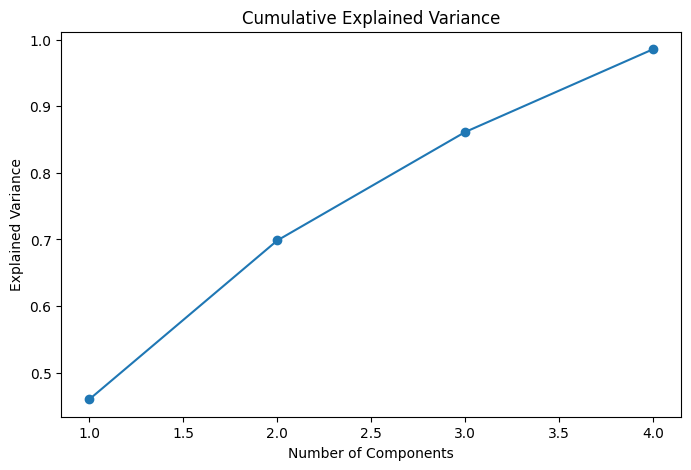

In [17]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


In [18]:
import pandas as pd

# Convert reduced data back to DataFrame
pca_df = pd.DataFrame(reduced_data)
pca_df.head()


,0,1,2,3
0,-2.200769,-1.159929,1.570512,-1.277323
1,-2.112692,-2.002005,1.679894,0.119662
2,-2.380961,-0.779009,-0.514514,-2.363736
3,-2.219585,-2.227951,-0.322982,-0.023522
4,-2.530305,-0.958118,-0.542956,-0.833446


In [19]:
from sklearn.cluster import DBSCAN


In [20]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
scaled_df['DBSCAN_Cluster'] = dbscan_labels
print(scaled_df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
-1    164
 2     13
 1      7
 3      7
 0      5
 4      4
Name: count, dtype: int64


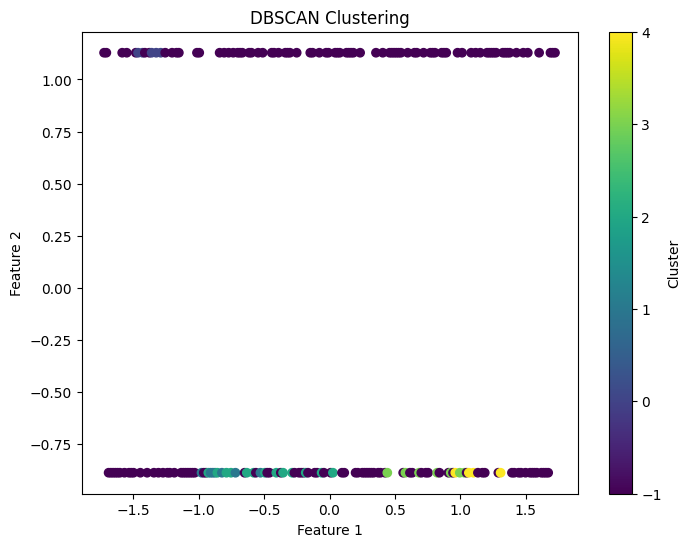

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [23]:
# Compute linkage matrix
linkage_matrix = linkage(scaled_data, method='ward')


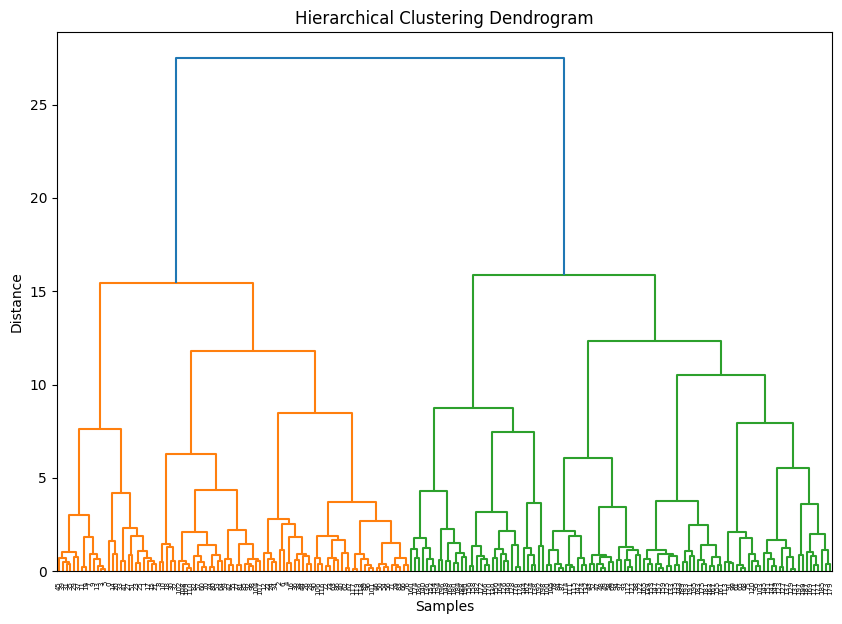

In [24]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [25]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
hier_clustering = AgglomerativeClustering(n_clusters=3)  # Replace 3 with your number of clusters
hier_labels = hier_clustering.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
scaled_df['Hierarchical_Cluster'] = hier_labels


In [26]:
from sklearn.metrics import silhouette_score

dbscan_score = silhouette_score(scaled_data, dbscan_labels)
hier_score = silhouette_score(scaled_data, hier_labels)

print(f"DBSCAN Silhouette Score: {dbscan_score}")
print(f"Hierarchical Clustering Silhouette Score: {hier_score}")


DBSCAN Silhouette Score: -0.2047016642481
Hierarchical Clustering Silhouette Score: 0.256161821863403
